# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [ ]:
from pathlib import Path
from ec4py import *
from ec4py import CV_Datas,EC_Data,CV_Data
from ec4py import AREA,LEGEND,RHE
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [ ]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Capacitance"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123317_ 1_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123330_ 1_MI.tdms")




## 3. Load in the data files

In [ ]:
a =EC_Data(paths[0])
a.setup


In [ ]:
a.channels

In [ ]:
EC_Data(paths[0]).plot("E","i_4",savefig="MWE_EC_Data" )

In [ ]:
a=CV_Data(paths[0],"i_2")

[L = 6.633e+04 g m^-2, L = 6.633e+04 g m^-2, L = 6.633e+04 g m^-2]


<Axes: xlabel='E vs RHE (V)', ylabel='i (A)'>

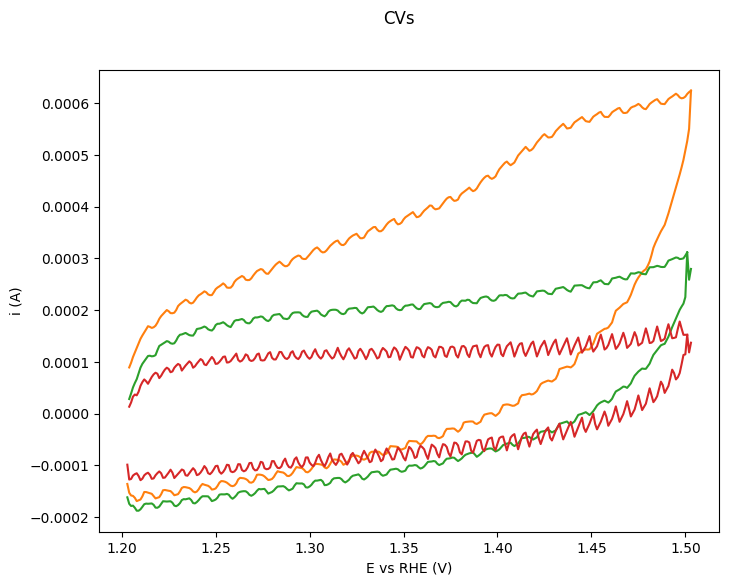

In [20]:
a=CV_Datas(paths,"i_2")
a.rate
a[0].set_mass(1.3,"g")
a[1].set_mass(1.3,"g")
a[2].set_mass(1.3,"g")
print(a.loading)
#a[0].plot(RHE,LOADING,LEGEND,color="yellow",grid=True)
a.plot(RHE, savefig="MWE_CV_Datas"  )


<Axes: xlabel='E vs RHE (V)', ylabel='i L$^{-1}$ (A g$^{-1}$ m$^{2}$)'>

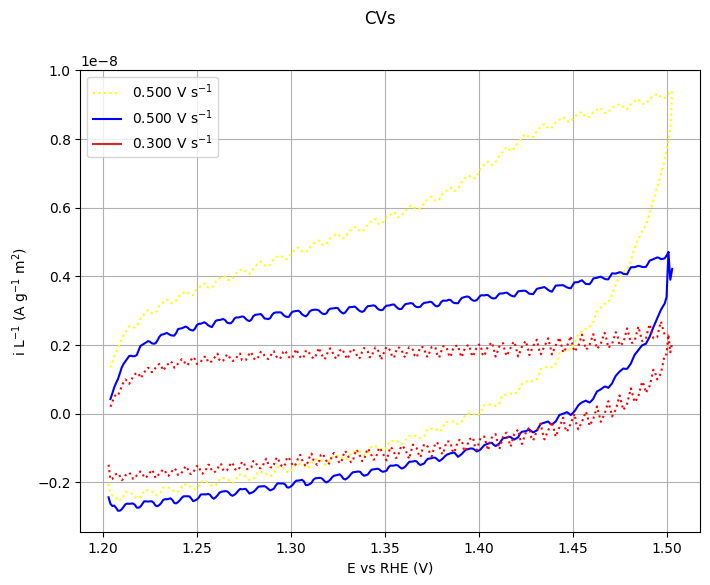

In [24]:
a.plot(RHE,LOADING,LEGEND.RATE,color=["yellow","blue","red"], linestyle =[":","o",":"], grid=True)

<Axes: xlabel='E vs RHE (V)', ylabel='i L$^{-1}$ (A g$^{-1}$ m$^{2}$)'>

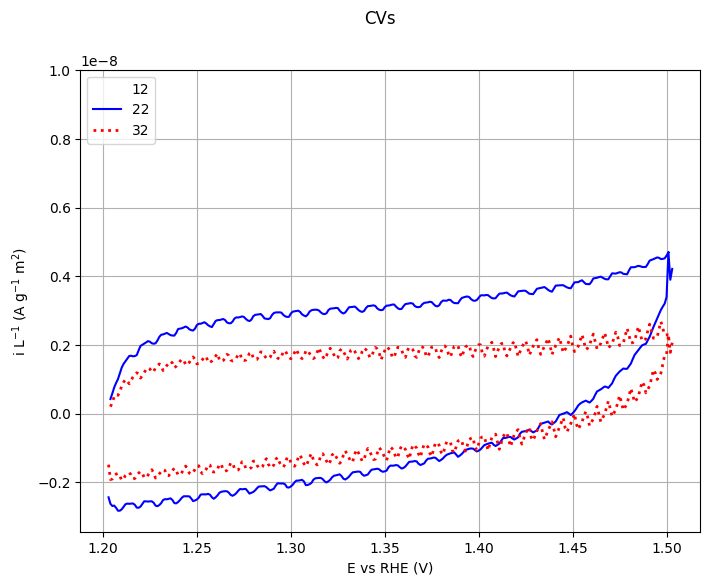

In [27]:
a.plot(RHE,LOADING,LEGEND.RATE,
       color=["yellow","blue","red"],
       label=["12","22","32","3333"],
       linewidth=[0.01,5,2], 
       linestyle =[":","o",":"], 
       grid=True,
       savefig="MWE_CV_Datas")

In [ ]:

a[1].get_i_at_E(0.5)



In [ ]:
a.get_i_at_E(1.3,"BB","RHE",RHE)
tuple()


In [ ]:
a.plot(AREA)

In [ ]:
a.RanSev(1.3,RHE)

In [ ]:
CVs = CV_Datas(paths)
for cv in CVs:
    #cv.set_area(0.04532, "cm^2")
    cv.get_E_at_i
    print("aa", cv.area)

In [ ]:
CVs[1].plot(4,title = "aa")

In [ ]:
#plot = CVs.plot("" ,legend = "name", smooth_y=50)
CVs[1].plot(title = "aa")
for cv in CVs[:1]:
    print(cv.rate)
    cv2 = cv * (1 / 1000.)
    #cv2.plot()

#CVs.bg_corr(CVs)
CVs.plot(AREA, LEGEND.NAME)
CVs[0].plot(AREA, LEGEND.RATE)
bg_corr = CVs.bg_corr(path_to_dataSetFolder / "CV_144913_ 3.tdms" )

#bg_corr.plot()

## 4. Levich analysis

In [ ]:
slope1, slope2 = CVs.Levich(-0.5,"area_cm", y_smooth = 11, )
#use the argument to normalize the data

## 5. Koutechy-Levich analysis

In [ ]:
slope1, slope2 = CVs.KouLev(-0.5,"area", y_smooth = 5)
print(slope1 ** 1, slope1 ** -1)
#use the argument to normalize the data

In [ ]:
CVs[0].Tafel([-0.2, -0.1 ],-0.5)

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)


#use the argument to normalize the data

In [ ]:
CVs.Tafel([-0.2, -0.1 ],-0.5)